In [1]:
import graph_handler 
import metaheuristics as mh
import matplotlib.pyplot as plt
import pickle

In [36]:
def compareByFmPasses(passes = 1, numberOfRunes = 20):

    graphInit = graph_handler.parse_graph("res/Graph500.txt", False)
    mlsCuts = []
    ilsCuts = []
    geneticCuts = []
    for i in range(numberOfRunes):
        print(i)
        genRes,_,_ = mh.geneticSearch(graphInit.copy(),  population=50, maxFmPass=passes )
        print("genetic done")
        _, mlsCutsInOneRun, runTimeMLS = mh.mls(graphInit.copy(), maxFmPasses=passes)
        print("mls done")
        
        _,ilsCutsInOneRun, _, runTimeILS = mh.ils(graphInit.copy(),startNumberOfMutations=10,  maxFmPasses=passes)
        print("ils done")
     
        mlsCuts.append(mlsCutsInOneRun)
        ilsCuts.append(ilsCutsInOneRun)
        geneticCuts.append(genRes)
        
        pickle.dump(mlsCuts, open("res/results/mls.p", "wb"))
        pickle.dump(geneticCuts, open("res/results/genetic.p", "wb"))
        pickle.dump(ilsCuts, open("res/results/ils.p", "wb"))
    return mlsCuts, ilsCuts, geneticCuts

mlsCuts, ilsCuts, geneticCuts = compareByFmPasses(passes = 1000, numberOfRunes= 2)

#print(graph_handler.getStringBinaryRepresentation(graphInit))


0
genetic done
mls done
ils done
1
genetic done
mls done
ils done


In [37]:
all_mls_cuts = pickle.load(open("res/results/mls.p", "rb"))
all_ils_cuts = pickle.load(open("res/results/ils.p", "rb"))
all_genetic_res = pickle.load(open("res/results/genetic.p", "rb"))


In [40]:
min_mls_cuts = [x[-1] for x in all_mls_cuts]
min_ils_cuts = [x[-1] for x in all_ils_cuts]
min_gen_cuts = [x[-1][0] for x in all_genetic_res]




[15, 22]

hi


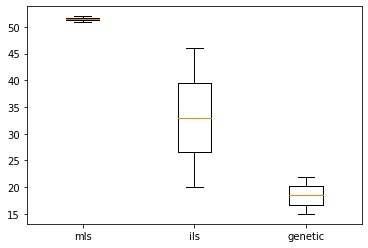

In [41]:
plt.boxplot([min_mls_cuts, min_ils_cuts, min_gen_cuts], labels=["mls", "ils", "genetic"])
plt.savefig("res/results/boxplotcomparison")
print("hi")